# Blue book bulldozer data analysis and predicting future SalePrice

## Introduction

In this project I have applied machine learning models to predict the future sale prices of heavy equipment at auction based on it's usage, equipment type, and configuaration.
Here In the project for the evaluation of the model Root Mean Square Log Error(RMSLE) is used. 

## About the dataset

### The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### The key fields are in train.csv are:
* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale

### Total data size is (412698, 53)
### after data processing it become (412698, 103)

#### Note-There are a lot of null values in the dataset which helps on learning how to handle various kinds of null values in the dataset


## About the Model used

### RandomForestRegressor
* A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

#### The hyperparameters that I have used for optimizing the model to get the best result

* n_estimators: (int, default=100) The number of trees in the forest.

* max_depth: (int, default=None) The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* min_samples_split: (int or float, default=2) The minimum number of samples required to split an internal node

* min_samples_leaf: (float, default=0.0) The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

* max_features: ({“auto”, “sqrt”, “log2”}, int or float, default=”auto”) The number of features to consider when looking for the best split

* bootstrap: (bool, default=True) Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

* n_jobs: (int, default=None) The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

* random_state: (int, RandomState instance or None, default=None) Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).

* verbose: (int, default=0) Controls the verbosity when fitting and predicting.


## The project steps involve:

1. Importing necessary libraries, models, and funcitons.
2. Getting the dataset from the source (https://www.kaggle.com/c/bluebook-for-bulldozers/data)
3. Data preparation (handling null values, remove unnecessary data, etc) 
4. Visualisation to analyse the data corelation and output dependency on the data features.
5. Selecting the classifier (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
5. Making train and test sets and training the classifiers to obtain base line model and eliminating some models based on accuracy.
6. Model evaluation using classification report, recall score, f1 score, etc.
7. Hyperparameter tuning using RandomSearchCV and GridSearchCV.
9. Finding the effective features using model.

### Importing the neccessary libraries, models, and functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from joblib import dump, load
import pickle

### Getting the dataset From the source

In [2]:
df = pd.read_csv("C:/Users/Asus/bluebook-for-bulldozers\/TrainAndValid.csv", low_memory = False, parse_dates = ["saledate"])

In [3]:
df.shape

(412698, 53)

In [4]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Data visualisation

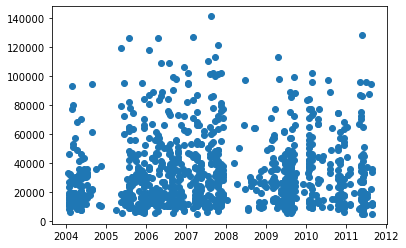

In [5]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], y = df["SalePrice"][:1000], );

### Data preparation

In [6]:
def preprocessing_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate",axis = 1, inplace=True)
    
    #dealing with the missing numeric and non numeric values
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + "_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
    return df

In [7]:
df_train = preprocessing_data(df)

In [8]:
df_train.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,False,False,True,True,True


### Making train and test sets

In [9]:
x_train, x_val, y_train, y_val = train_test_split(df_train.drop("SalePrice", axis=1), df_train["SalePrice"], test_size = 0.2)

### Baseline model training

In [10]:
model = RandomForestRegressor(n_jobs=-1, random_state = 42)
model.fit(x_train[:10000],y_train[:10000])

RandomForestRegressor(n_jobs=-1, random_state=42)

### Model evaluation  functions

In [10]:
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
def eval_model(y_test, y_test_preds, y_train, y_train_preds):
    eval_dict = {}
    eval_dict["Train RMSLE"] = rmsle(y_train, y_train_preds)
    eval_dict["Test RMSLE"] = rmsle(y_test, y_test_preds)
    eval_dict["Train R^2"] = r2_score(y_train, y_train_preds)
    eval_dict["Test R^2"] = r2_score(y_test, y_test_preds)
    eval_dict["Train MSE"] = mean_squared_error(y_train, y_train_preds)
    eval_dict["Test MSE"] = mean_squared_error(y_test, y_test_preds)
    return eval_dict
    

# y_train_preds = model.predict(x_train[:10000])
# y_test_preds = model.predict(x_val)
# # rmsle(y_train[:10000], y_pred)
# # rmsle(y_val, y_preds)
# eval_model(y_val, y_test_preds, y_train[:10000], y_train_preds)

### Baseline model evaluation

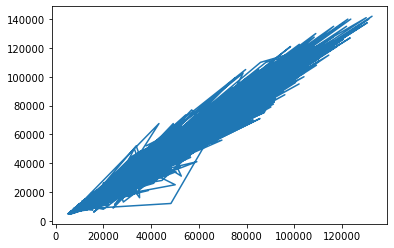

In [12]:
fix, ax = plt.subplots()
plt.plot(y_train_preds, y_train[:10000])

In [87]:
corr_values = df_train.corr()
# fig, ax = plt.subplots(figsize=(15,10))
# ax = sn.heatmap(corr_values,
#                 annot=True,
#                 linewidths=0.5,
#                 fmt=".2f",
#                 cmap="YlGnBu")

### Hyperparameter tuning using the RandomizedSearchCV

In [108]:
# the first grid values

# rscv_grid = {"max_depth":[int(x) for x in np.linspace(10,110, num=11)],
#             "max_features":["auto","sqrt"],
#             "min_samples_leaf":[1,2,4],
#             "min_samples_split":[2,5,10],
#             "n_estimators":[int(x) for x in np.linspace(200, 2000, num=10)],
#             "bootstrap":[True, False]}

# values obtained
# {'n_estimators': 1200,
#  'min_samples_split': 2,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 50,
#  'bootstrap': True}

# after some more tries

# {'n_estimators': 1220,
#  'min_samples_split': 2,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 40,
#  'bootstrap': True}

#main grid values used at end
rscv_grid = {"max_depth":[40,50,60],
            "max_features":["auto"],
            "min_samples_leaf":[2],
            "min_samples_split":[2,5],
            "n_estimators":[1210,1200,1220],
            "bootstrap":[True]}

model_op1 = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = model_op1, param_distributions = rscv_grid,
                              verbose = True, cv=5, n_iter = 10, random_state = 42, n_jobs = -1)
rf_random.fit(x_train[:10000], y_train[:10000])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 28.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [40, 50, 60],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [1210, 1200, 1220]},
                   random_state=42, verbose=True)

In [109]:
rf_random.best_params_

{'n_estimators': 1220,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [98]:
rf_random.score(x_val, y_val)

0.8220254083667689

In [110]:
y_train_preds = rf_random.predict(x_train[:10000])

In [116]:
y_test_preds = rf_random.predict(x_val[:200])

In [118]:
eval_model(y_val[:200], y_test_preds, y_train[:10000], y_train_preds)

{'Train RMSLE': 0.13794442779386829,
 'Test RMSLE': 0.27889963571173093,
 'Train R^2': 0.9655371066926224,
 'Test R^2': 0.8214328988232341,
 'Train MSE': 17920612.009776704,
 'Test MSE': 113828388.34697391}

### Hyperparameter tuning using GridSearchCV

In [119]:
# Grid used for hyperparameter tuning
gscv_grid = {"max_depth":[30,40],
            "max_features":["auto"],
            "min_samples_leaf":[2],
            "min_samples_split":[2],
            "n_estimators":[1220,1230],
            "bootstrap":[True]}
model_op2 = RandomForestRegressor()
gv_random = GridSearchCV(estimator = model_op2, 
                        param_grid = gscv_grid,
                        cv = 5,
                        verbose = True,
                        n_jobs=-1)
gv_random.fit(x_train[:10000], y_train[:10000])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed: 13.5min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 13.6min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [30, 40],
                         'max_features': ['auto'], 'min_samples_leaf': [2],
                         'min_samples_split': [2],
                         'n_estimators': [1220, 1230]},
             verbose=True)

In [104]:
model = RandomForestRegressor(n_estimators = 90,
                             min_samples_split = 16,
                             min_samples_leaf=11,
                             max_features = "auto",
                             max_depth=10,
                              n_jobs=-1, 
                              random_state = 42,
                             )

In [106]:
model.fit(x_train[:10000], y_train[:10000])

RandomForestRegressor(max_depth=10, min_samples_leaf=11, min_samples_split=16,
                      n_estimators=90, n_jobs=-1, random_state=42)

In [107]:
y_train_preds = model.predict(x_train[:10000])
y_test_preds = model.predict(x_val)
# rmsle(y_train[:10000], y_pred)
# rmsle(y_val, y_preds)
eval_model(y_val, y_test_preds, y_train[:10000], y_train_preds)

{'Train RMSLE': 0.27251360636603766,
 'Test RMSLE': 0.31163812605080077,
 'Train R^2': 0.8449936133094519,
 'Test R^2': 0.7850724623523962,
 'Train MSE': 80602904.989526,
 'Test MSE': 116806855.51686443}

### Testing the models from the parameters obtained using and GridSearchCv

In [114]:
df.shape

(412698, 103)

In [120]:
gv_random.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1220}

In [121]:
y_train_preds = gv_random.predict(x_train[:10000])
y_test_preds = gv_random.predict(x_val[:200])

In [123]:
eval_model(y_val[:200], y_test_preds, y_train[:10000], y_train_preds)

{'Train RMSLE': 0.13795001730834705,
 'Test RMSLE': 0.2795110118022656,
 'Train R^2': 0.9653701875172513,
 'Test R^2': 0.8231486744073578,
 'Train MSE': 18007409.532902144,
 'Test MSE': 112734659.61296397}

### Final model for the project

In [11]:
model = RandomForestRegressor(n_estimators = 1220,
                             min_samples_split = 2,
                             min_samples_leaf=2,
                             max_features = "auto",
                             max_depth=30,
                              bootstrap = True,
                              n_jobs=-1, 
                              random_state = 42,
                              verbose = True
                             )
model.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 1220 out of 1220 | elapsed: 45.8min finished


RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=1220,
                      n_jobs=-1, random_state=42, verbose=True)

In [12]:
y_train_preds = model.predict(x_train[:10000])
y_test_preds = model.predict(x_val[:200])


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   11.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:   42.6s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 1220 out of 1220 | elapsed:  1.7min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    6.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:   11.8s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:   18.8s
[Parallel(n_jobs=12)]: Done 1220 out of 1220 | elapsed:   23.2s finished


In [13]:
eval_model(y_val[:200], y_test_preds, y_train[:10000], y_train_preds)

{'Train RMSLE': 0.1022336116955249,
 'Test RMSLE': 0.23792864658953938,
 'Train R^2': 0.9794055665265672,
 'Test R^2': 0.8477463526636055,
 'Train MSE': 11210982.667033238,
 'Test MSE': 69362462.22619832}

In [37]:
model.score(x_val[:200], y_val[:200])

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 1220 out of 1220 | elapsed:    0.7s finished


0.8862032085445838

### saving the model

In [17]:
dump(model, filename="bulldozermodel.joblib", compress=3)

['bulldozermodel.joblib']

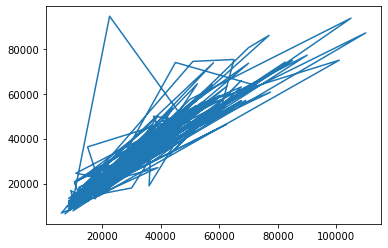

In [19]:
fig, ax = plt.subplots()
plt.plot(y_val[:200], y_test_preds)